### Load Data

In [2]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/'

# Load files into a pandas dataframes
#file = path + 'Dataset.xlsx'
file = path + 'Dataset_outliers.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Set index
df = df.set_index("Date")

### Split Data

In [5]:
test_size = 0.2         # Train/Test split
dep_var = 'Orders'      # Dependant variable (TIV or Orders)

# Select input and target variables
X = df.drop(dep_var, axis=1)
y = df[dep_var]

# Split data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=False)

# Print shape
X_train.shape, X_test.shape 

# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform (X_test)

In [6]:
import plotly.graph_objs as go
title = dep_var + ' 2011–2022 - Train/Test Split'
fig= go.Figure()
fig.add_trace(go.Scatter(dict(x=X_train.index, y=y_train, mode='lines+markers', name= 'Train')))
fig.add_trace(go.Scatter(dict(x=X_test.index, y=y_test, mode='lines+markers', name= 'Test')))
fig.update_layout(title=go.layout.Title(
 text=title,
 xref='paper',x=0),
 margin=dict(l=10, r=0, t=50, b=50),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date',font=dict(
 family='Courier New, monospace',
 size=6,
 color='#7f7f7f'))),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Retails',font=dict(
 family='Courier New, monospace',
 size=18,
 color='#7f7f7f'))))
fig.show()

### Scoring function

In [7]:
# Importing the metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the modules
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objs as go

metrics = pd.DataFrame()

def scoring(model_name, model, X_train_set, y_train_set, features, labels):

    # Fit the regressor to the training data
    model.fit(X_train_set, y_train_set)    
    
    # Make predictions
    predictions = model.predict(features)
    
    # Calculate metrics
    mae = mean_absolute_error(labels, predictions)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(labels, predictions)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                               # RMSE (Root Mean Squared Error)
    r2 = r2_score(labels, predictions)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((labels - predictions) / labels)) * 100       # MAPE
    accuracy = 100 - mape                                               # Accuracy

    # Append metrics for summary
    metrics[model_name] = [mae, mse, rmse, r2, mape, accuracy]
    metrics.index = ['Mean Absolute Error', 
                    'Mean Squared Error', 
                    'Root Mean Squared Error',
                    'R^2',
                    'Mean Absolute Percentage Error',
                    'Accuracy']
    
    # Print metrics  
    print(model_name, 'Model Performance:')                             # Model name
    print('Mean Absolute Error: {:0.2f}.'.format(mae))                  # MAE
    print('Mean Squared Error: {:0.2f}.'.format(mse))                   # MSE
    print('Root Mean Squared Error: {:0.2f}.'.format(rmse))             # RMSE  
    print('R^2 Score = {:0.2f}.'.format(r2))                            # R2
    print('Mean Absolute Percentage Error: {:0.2f}%.'.format(mape))     # MAPE 
    print('Accuracy = {:0.2f}%.'.format(accuracy))                      # Accuracy

    df = pd.DataFrame(labels)
        
    # Plot Actual values vs predicted values
    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=df.index, y=labels, mode='lines+markers', name= 'Actual')))
    fig.add_trace(go.Scatter(dict(x=df.index, y=predictions, mode='lines+markers', name= 'Predicted')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions with ' + model_name,
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date',font=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars',font=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'))))
    fig.show()   

### XGBoost (Extreme Gradient Boosting)

#### Baseline

In [12]:
import xgboost as xgb

# Import XGBRegressor
from xgboost import XGBRegressor         
          
# Instantiate the regressor
model = XGBRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

XGBRegressor Model Performance:
Mean Absolute Error: 152.80.
Mean Squared Error: 28867.58.
Root Mean Squared Error: 169.90.
R^2 Score = -1.97.
Mean Absolute Percentage Error: 59.27%.
Accuracy = 40.73%.


In [9]:
# Compute and print model score with scaled data
model_name = model.__class__.__name__ + ' Scaled'
scoring(model_name, model, X_train_norm, y_train, X_test_norm, y_test)

XGBRegressor Scaled Model Performance:
Mean Absolute Error: 152.80.
Mean Squared Error: 28867.58.
Root Mean Squared Error: 169.90.
R^2 Score = -1.97.
Mean Absolute Percentage Error: 59.27%.
Accuracy = 40.73%.


https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7


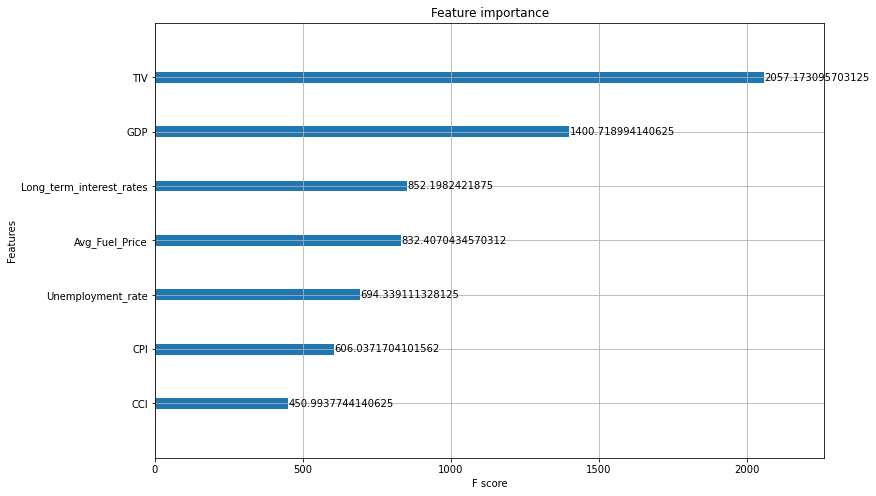

In [16]:
from xgboost import plot_importance
#importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(model, ax=ax, importance_type='gain') 
plt.show();

In [25]:
dict(sorted(model.get_booster().get_score(importance_type='total_gain').items(), key=lambda item: item[1]))

{'Avg_Fuel_Price': 143174.015625,
 'Unemployment_rate': 153448.9375,
 'CCI': 167769.6875,
 'Long_term_interest_rates': 179813.828125,
 'CPI': 181205.109375,
 'GDP': 536475.375,
 'TIV': 569836.9375}

#### Feature Selection

In [26]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    # Fit the regressor to the training data
    selection_model = XGBRegressor(random_state=42)
    selection_model.fit(select_X_train, y_train)    
    
    # Make predictions
    y_pred = selection_model.predict(select_X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(y_test, y_pred)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                          # RMSE (Root Mean Squared Error)
    r2 = r2_score(y_test, y_pred)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100       # MAPE
    accuracy = 100 - mape                                          # Accuracy
    
    # Print metrics
    print("Thresh=%.3f, n=%d, MAE=%.3f, MSE=%.3f, RMSE==%.3f, R2==%.3f, MAPE==%.3f, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], mae, mse, rmse, r2, mape, accuracy))


Thresh=0.065, n=7, MAE=152.801, MSE=28867.582, RMSE==169.905, R2==-1.973, MAPE==59.274, Accuracy: 40.73%
Thresh=0.088, n=6, MAE=171.463, MSE=35854.312, RMSE==189.352, R2==-2.692, MAPE==65.661, Accuracy: 34.34%
Thresh=0.101, n=5, MAE=167.619, MSE=34468.996, RMSE==185.658, R2==-2.549, MAPE==62.511, Accuracy: 37.49%
Thresh=0.121, n=4, MAE=151.560, MSE=30038.748, RMSE==173.317, R2==-2.093, MAPE==57.857, Accuracy: 42.14%
Thresh=0.124, n=3, MAE=145.880, MSE=26973.228, RMSE==164.235, R2==-1.778, MAPE==53.399, Accuracy: 46.60%
Thresh=0.203, n=2, MAE=150.586, MSE=28637.927, RMSE==169.227, R2==-1.949, MAPE==53.916, Accuracy: 46.08%
Thresh=0.298, n=1, MAE=241.166, MSE=76753.806, RMSE==277.045, R2==-6.904, MAPE==90.493, Accuracy: 9.51%


In [27]:
df.columns

Index(['Orders', 'GDP', 'CCI', 'CPI', 'Unemployment_rate',
       'Long_term_interest_rates', 'Avg_Fuel_Price', 'TIV'],
      dtype='object')

In [36]:
features = [
#    'Orders', 
#    'TIV'
#    'GDP', 
    'CPI', 
    'CCI', 
    'Unemployment_rate',
#    'Long_term_interest_rates', 
    'Avg_Fuel_Price',
    ]

X_train_fs = X_train.drop(features, axis=1)
X_test_fs = X_test.drop(features, axis=1)

In [38]:
# Compute and print model score with scaled data
model_name = model.__class__.__name__ + ' with Feature Selection'
scoring(model_name, model, X_train_fs, y_train, X_test_fs, y_test)

XGBRegressor with Feature Selection Model Performance:
Mean Absolute Error: 145.88.
Mean Squared Error: 26973.23.
Root Mean Squared Error: 164.24.
R^2 Score = -1.78.
Mean Absolute Percentage Error: 53.40%.
Accuracy = 46.60%.


#### Hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning
xgb_n_estimators = [100, 500, 1000]
xgb_max_depth = [4, 6, 8]
xgb_min_child_weight = [1, 3, 5]
xgb_eta = [0.01, 0.1, 0.2, 0.3]
#xgb_subsample = [0.9, 0.5, 0.2, 0.1]
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
param_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'eta': xgb_eta,
#            'subsample': xgb_subsample,
            'objective': xgb_objective}

# Tune the Model
model_base = XGBRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

 The best score across ALL searched params:
 -0.25733665811250755

 The best parameters across ALL searched params:
 {'eta': 0.3, 'max_depth': 8, 'min_child_weig

#### Tuned Model

In [40]:
# Create the fnal Extreme Gradient Booster
model_tuned = XGBRegressor(objective = 'reg:squarederror',
                         n_estimators = 100,
                         min_child_weight = 1,
                         max_depth = 8,                                                  
                         eta = 0.3,
                         random_state = 42)

# Fit the regressor to the training data
model_tuned.fit(X_train, y_train)

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

XGBRegressor Tuned Model Performance:
Mean Absolute Error: 137.26.
Mean Squared Error: 23167.81.
Root Mean Squared Error: 152.21.
R^2 Score = -1.39.
Mean Absolute Percentage Error: 53.09%.
Accuracy = 46.91%.


### LGBM (Light Gradient Boosting Model)

#### Baseline

In [41]:
import lightgbm as lgbm

# Import LightGBM Regressor
from lightgbm import LGBMRegressor
          
# Instantiate the regressor
model = LGBMRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

LGBMRegressor Model Performance:
Mean Absolute Error: 189.44.
Mean Squared Error: 44168.67.
Root Mean Squared Error: 210.16.
R^2 Score = -3.55.
Mean Absolute Percentage Error: 74.80%.
Accuracy = 25.20%.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

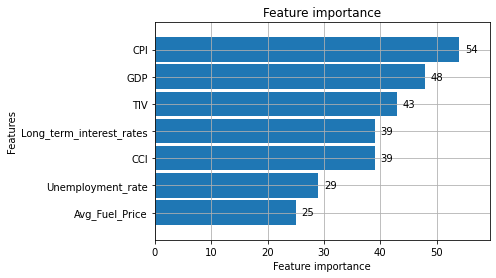

In [42]:
lgbm.plot_importance(model, max_num_features = 60, height=.9)

#### Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning
lgbm_n_estimators = [100, 500, 1000]
lgbm_max_depth = [4, 6, 8]
lgbm_num_leaves = [3, 5, 7]
lgbm_learning_rate = [0.01, 0.1, 0.2, 0.3]
lgbm_subsample = [0.9, 0.5, 0.2, 0.1]

# Create the grid
param_grid = {'n_estimators': lgbm_n_estimators,
            'max_depth': lgbm_max_depth,
            'num_leaves': lgbm_num_leaves,
            'learning_rate': lgbm_learning_rate,
            'subsample': lgbm_learning_rate
           }

# Tune the Model
model_base = LGBMRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMRegressor(learning_rate=0.01, max_depth=4, n_estimators=1000, num_leaves=3,
              random_state=42, subsample=0.01)

 The best score across ALL searched params:
 -0.2716126544152176

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'num_leaves': 3, 'subsample': 0.01}


#### Tuned Model

In [44]:
# Create the fnal LightGBM Model
model_tuned = LGBMRegressor(n_estimators = 1000,
                         num_leaves= 3,
                         max_depth = 4,                         
                         subsample = 0.01,
                         learning_rate= 0.01,
                         random_state = 42)

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

LGBMRegressor Tuned Model Performance:
Mean Absolute Error: 183.42.
Mean Squared Error: 42169.11.
Root Mean Squared Error: 205.35.
R^2 Score = -3.34.
Mean Absolute Percentage Error: 72.99%.
Accuracy = 27.01%.


### Random Forest

#### Baseline

In [45]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
          
# Instantiate the regressor
model = RandomForestRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

RandomForestRegressor Model Performance:
Mean Absolute Error: 203.69.
Mean Squared Error: 48151.36.
Root Mean Squared Error: 219.43.
R^2 Score = -3.96.
Mean Absolute Percentage Error: 79.33%.
Accuracy = 20.67%.


#### Hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning 
rf_n_estimators = [100, 500, 1000]
rf_max_depth = [4, 6, 8, 10]
rf_max_features = ['auto', 'sqrt']
rf_min_samples_leaf = [1, 2, 4]
rf_min_samples_split = [2, 5, 10]
rf_bootstrap = [True, False]

# Create the grid
param_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'max_features': rf_max_features,
           'min_samples_leaf': rf_min_samples_leaf,
           'min_samples_split': rf_min_samples_split,
           'bootstrap': rf_bootstrap
        }

# Tune the Model
model_base = RandomForestRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4,
                      random_state=42)

 The best score across ALL searched params:
 -0.2137355768431033

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Tuned Model

In [47]:
# Create the fnal Random Forest Regressor Model
model_tuned = RandomForestRegressor(n_estimators = 100,
                         max_depth = 8,                         
                         max_features = 'sqrt',
                         min_samples_leaf= 4,
                         min_samples_split = 2,
                         bootstrap = True,
                         random_state = 42)

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

RandomForestRegressor Tuned Model Performance:
Mean Absolute Error: 203.53.
Mean Squared Error: 49514.04.
Root Mean Squared Error: 222.52.
R^2 Score = -4.10.
Mean Absolute Percentage Error: 80.55%.
Accuracy = 19.45%.


### Summary

In [48]:
pd.options.display.float_format = "{:,.2f}".format
metrics

,XGBRegressor,XGBRegressor Scaled,XGBRegressor with Feature Selection,XGBRegressor Tuned,LGBMRegressor,LGBMRegressor Tuned,RandomForestRegressor,RandomForestRegressor Tuned
Mean Absolute Error,152.80,152.80,145.88,137.26,189.44,183.42,203.69,203.53
Mean Squared Error,"28,867.58","28,867.58","26,973.23","23,167.81","44,168.67","42,169.11","48,151.36","49,514.04"
Root Mean Squared Error,169.90,169.90,164.24,152.21,210.16,205.35,219.43,222.52
R^2,-1.97,-1.97,-1.78,-1.39,-3.55,-3.34,-3.96,-4.10
Mean Absolute Percentage Error,59.27,59.27,53.40,53.09,74.80,72.99,79.33,80.55
Accuracy,40.73,40.73,46.60,46.91,25.20,27.01,20.67,19.45


### Feature engineering ?

In [ ]:
df['Year'] = df.index.astype(str).str[:4]
df['Month'] = df.index.astype(str).str[5:7]

df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = [d.strftime('%b') for d in df.index]